In [1]:
#import required packages to plot and execute the needed analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading my csv into the df
df = pd.read_csv('EV_cars.csv')

In [3]:
#display the first five rows of the dataset
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [4]:
#check the df for missing values in each column
df.isnull().sum()

Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               51
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64

In [5]:
#drop missing values from price and fast charge columns, while creating a new df called df1
df1 = df.dropna(subset = ['Price.DE.','Fast_charge'])

In [6]:
#check the new df1 for any missing values
df1.isnull().sum()

Battery                 0
Car_name                0
Car_name_link           0
Efficiency              0
Fast_charge             0
Price.DE.               0
Range                   0
Top_speed               0
acceleration..0.100.    0
dtype: int64

In [7]:
#Look for price outliers, any price greater then or equal to 160,000
df1['Price.DE._outlier'] = df1['Price.DE.'] >= 160000
outliers_df = df1[df1['Price.DE._outlier']]
#create df of price and price outliers with true as label
outliers_df = outliers_df[['Price.DE.', 'Price.DE._outlier']]
print(outliers_df)

     Price.DE.  Price.DE._outlier
67    218000.0               True
147   218000.0               True
210   181800.0               True
231   197740.0               True
306   164420.0               True
325   165848.0               True
329   199168.0               True
335   198692.0               True
349   165372.0               True


C:\Users\ehoml\AppData\Local\Temp\ipykernel_16132\3692529389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price.DE._outlier'] = df1['Price.DE.'] >= 160000


In [8]:
#used the describe and info function to find descriptive statistics of each feature
print(df1.describe())
print(df1.info())
print(df1['Car_name'].value_counts())

          Battery  Efficiency  Fast_charge      Price.DE.       Range  \
count  307.000000  307.000000   307.000000     307.000000  307.000000   
mean    71.386319  195.586319   552.833876   67529.882736  370.602606   
std     20.363656   32.672692   240.318651   34462.344923  107.870255   
min     21.300000  137.000000   170.000000   22550.000000  135.000000   
25%     57.500000  171.000000   335.000000   45867.500000  297.500000   
50%     70.500000  188.000000   520.000000   56950.000000  380.000000   
75%     85.000000  209.500000   680.000000   73624.500000  447.500000   
max    123.000000  295.000000  1290.000000  218000.000000  685.000000   

        Top_speed  acceleration..0.100.  
count  307.000000            307.000000  
mean   181.429967              7.275896  
std     36.479166              3.087695  
min    125.000000              2.100000  
25%    155.000000              4.800000  
50%    180.000000              6.700000  
75%    200.500000              9.000000  
max   

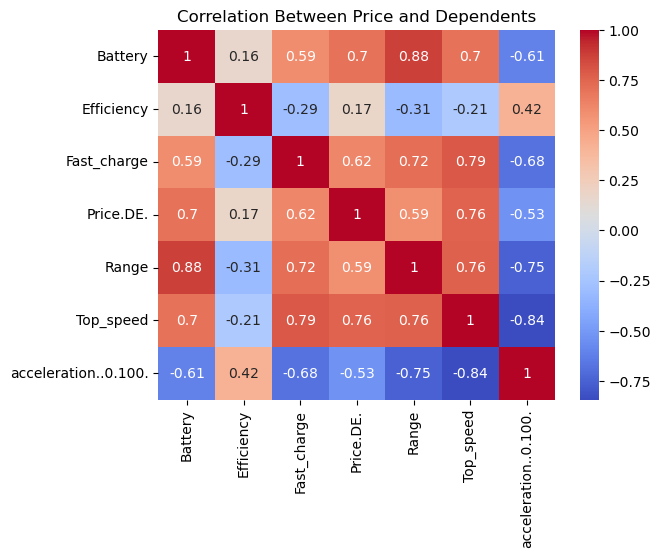

In [9]:
#create a correlation matrix with different variables
correlation_matrix = df1[['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #shows a heatmap of the features
plt.title('Correlation Between Price and Dependents')
plt.show() #shows the plot

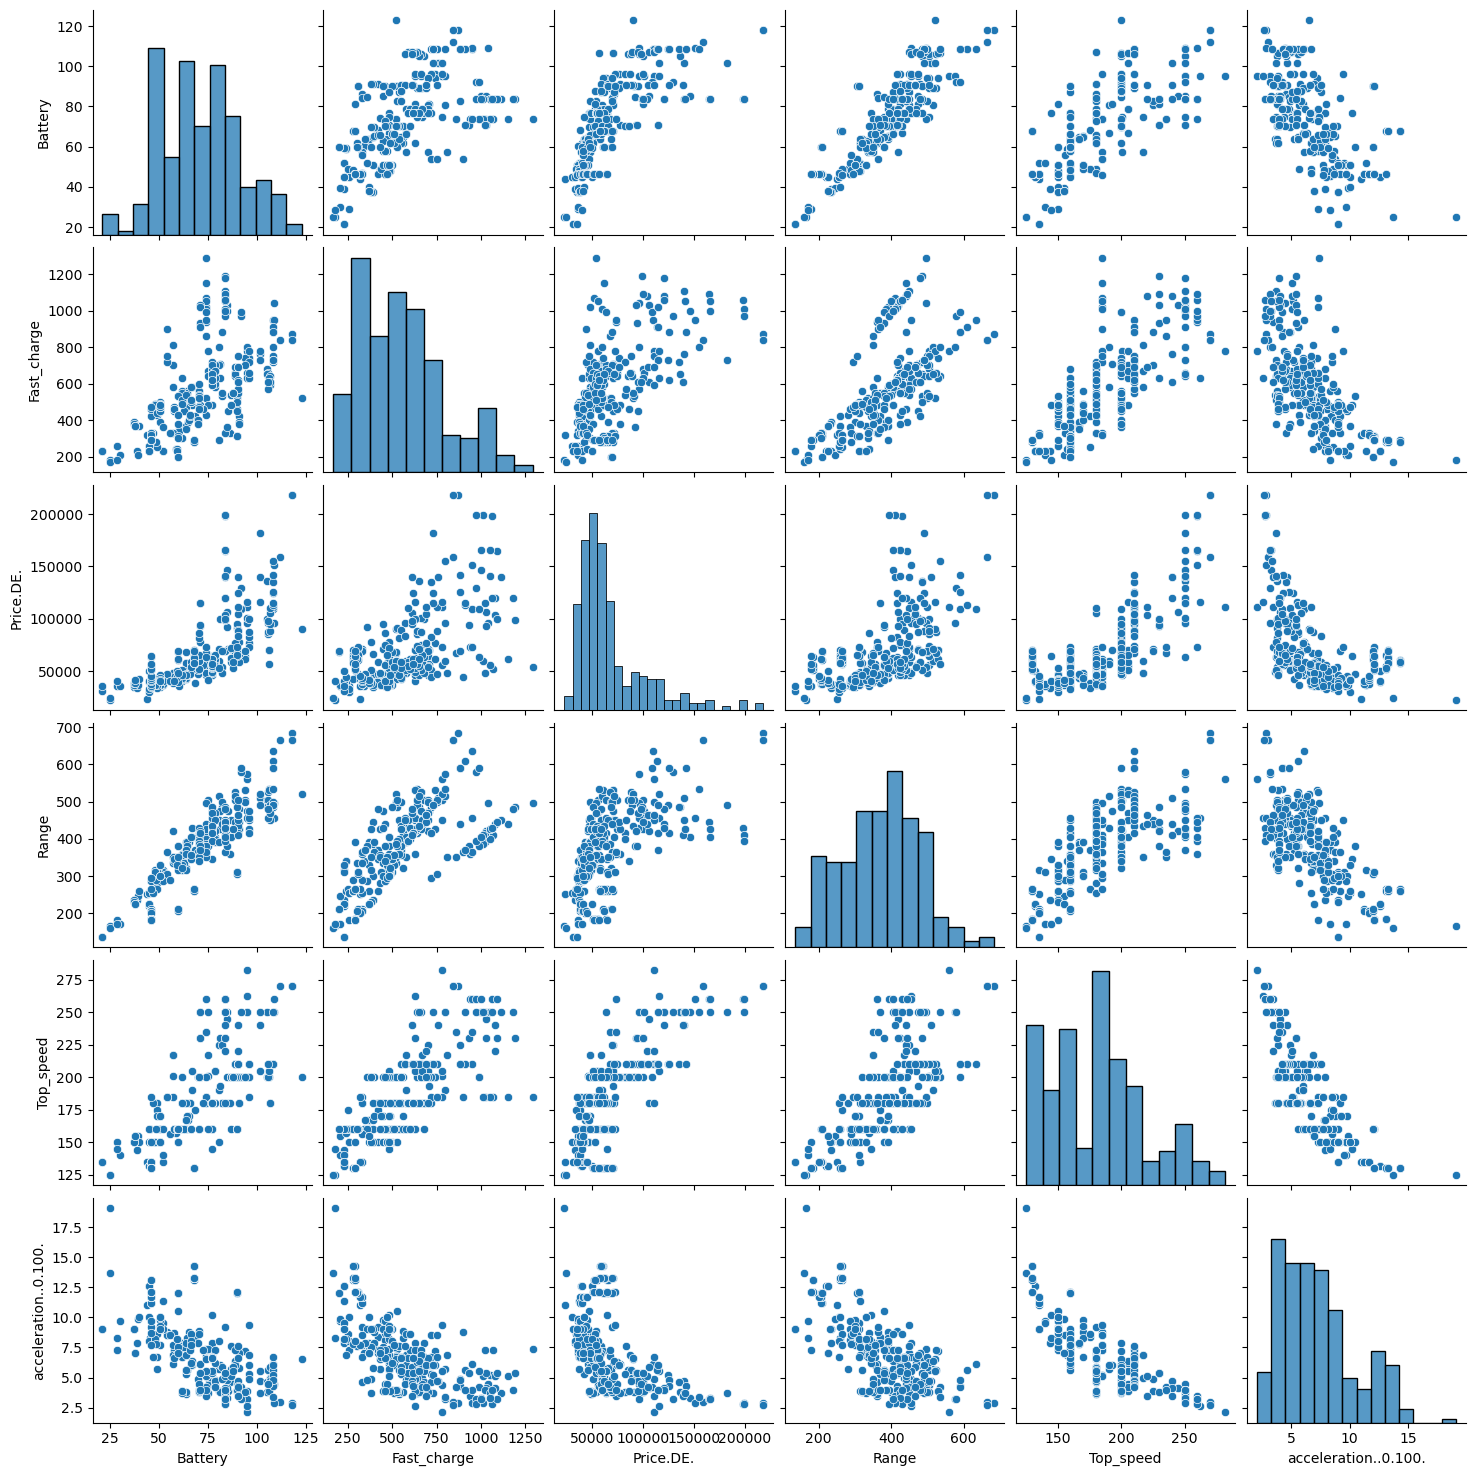

In [10]:
#pairplots of Battery, Fast charge, Price, Range, Top speed, and acceleration.
sns.pairplot(df1[['Battery', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.']])
plt.show()

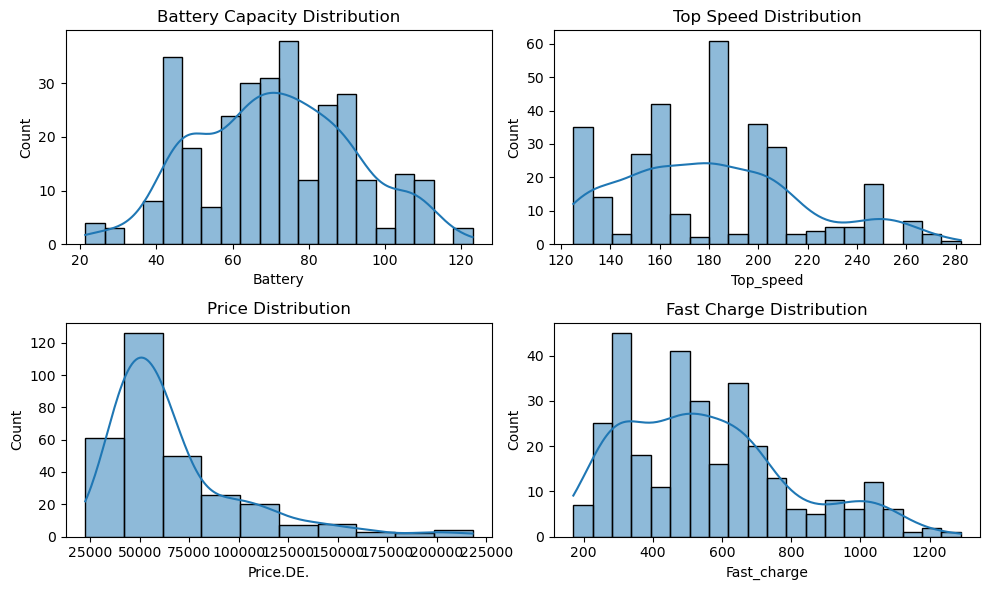

In [11]:
#These plots show the distrbution of four important features of EVs, with disturbution curves.
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df1['Battery'], bins=20, kde=True)
plt.title('Battery Capacity Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df1['Top_speed'], bins=20, kde=True)
plt.title('Top Speed Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df1['Price.DE.'], bins=10, kde=True)
plt.title('Price Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df1['Fast_charge'], bins=20, kde=True)
plt.title('Fast Charge Distribution')

plt.tight_layout()
plt.show()

# linear regression model

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df1[['Battery', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.']] # features
y = df1['Price.DE.'] #target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #training and testing split


lm = LinearRegression()
lm.fit(X_train, y_train)


lm_train_predictions = lm.predict(X_train) #training predictions


lm_train_mse = mean_squared_error(y_train, lm_train_predictions) #Mean squared errror
lm_train_r2 = r2_score(y_train, lm_train_predictions) #R^2


print("Linear Regression Model - Predictions on Training Set:")
print(f"MSE: {lm_train_mse}")
print(f"R-squared: {lm_train_r2}")


lm_test_predictions = lm.predict(X_test) #testing predictions


lm_test_mse = mean_squared_error(y_test, lm_test_predictions) #Mean squared errror
lm_test_r2 = r2_score(y_test, lm_test_predictions) #R^2


print("\nLinear Regression Model - Predictions on Testing Set:")
print(f"MSE: {lm_test_mse}")
print(f"R-squared: {lm_test_r2}")

Linear Regression Model - Predictions on Training Set:
MSE: 359628762.43398637
R-squared: 0.7101069632709543

Linear Regression Model - Predictions on Testing Set:
MSE: 289040311.6420798
R-squared: 0.6969459424707583


# Lasso/XGboost regression model

In [13]:
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df1[['Battery', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.']] #training features
y = df1['Price.DE.'] #target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1) #lasso regression
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [16]:
selected_features = SelectFromModel(lasso, threshold=0.25)
selected_features.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.1), threshold=0.25)

In [17]:
X_train_selected = selected_features.transform(X_train)
X_test_selected = selected_features.transform(X_test)

In [18]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [19]:
xgb_predictions = xgb.predict(X_test_selected)
mse = mean_squared_error(y_test, xgb_predictions)
r2 = r2_score(y_test, xgb_predictions)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 116761416.87560076
R-squared: 0.877577556756749


# Feature Importance

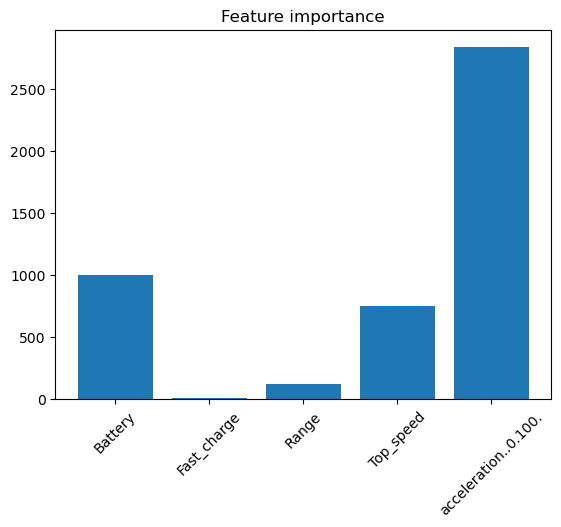

In [37]:
#Lasso regression plot that shows the importance of features.
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train) #uses the x and y train


importance = np.abs(lasso.coef_)


feature_names = ['Battery', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.']  #creates the lables for each feature

plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=45)
plt.title("Feature importance")
plt.show() #shows the plot

# Visualization of influential factors

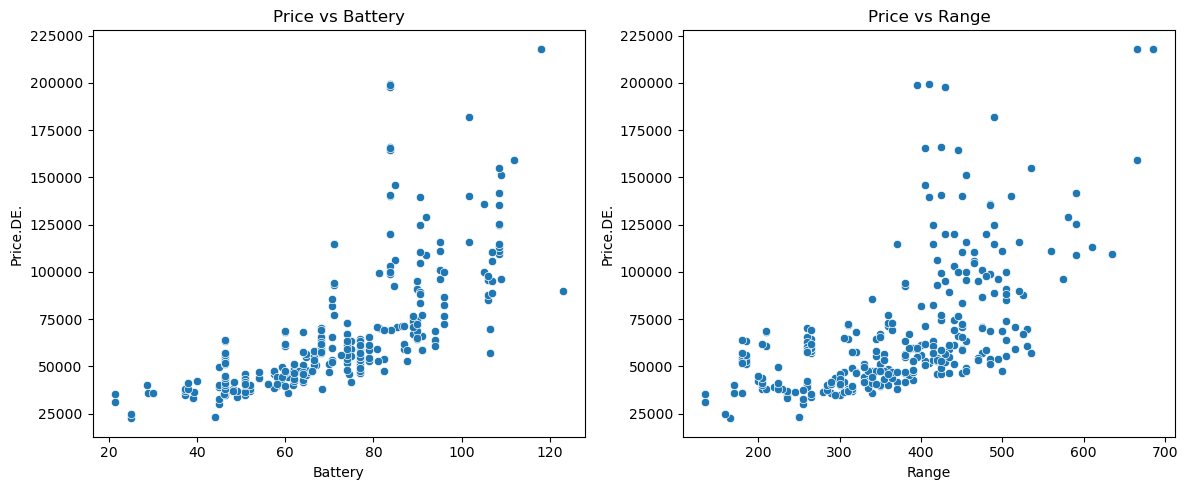

In [33]:
#plots the Price vs Battery
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Battery', y='Price.DE.', data=df1) #creates x and y labels
plt.title('Price vs Battery')  #labels the title

#plots the Price vs Range
plt.subplot(1, 2, 2)
sns.scatterplot(x='Range', y='Price.DE.', data=df1) #creates x and y labels
plt.title('Price vs Range')  #labels the title


plt.tight_layout()
plt.show() #shows the plots

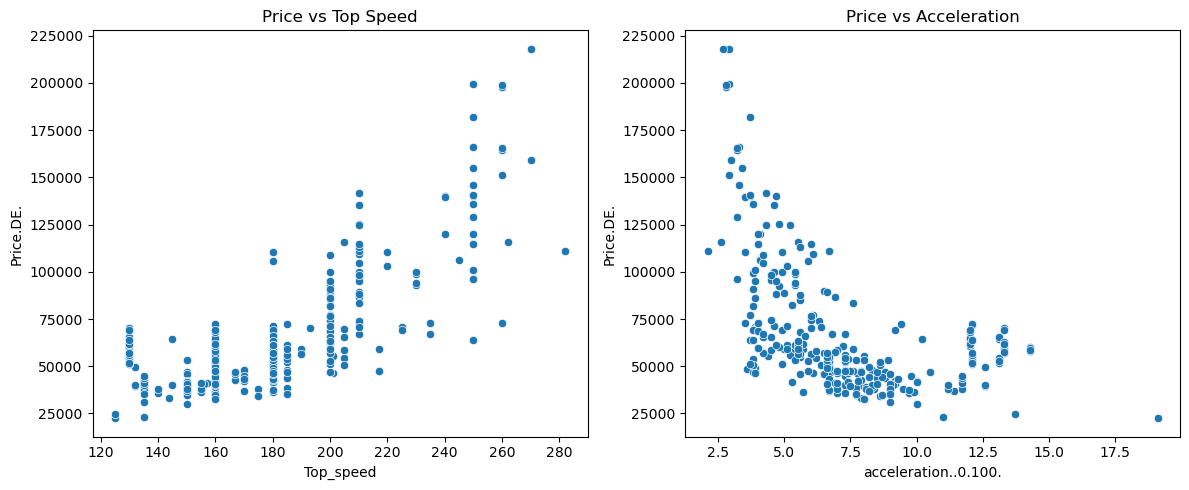

In [38]:
#plots the Price vs Top speed
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.scatterplot(x='Top_speed', y='Price.DE.', data=df1) #creates x and y labels
plt.title('Price vs Top Speed')  #labels the title

#plots the Price vs Acceleration
plt.subplot(1, 2, 2)
sns.scatterplot(x='acceleration..0.100.', y='Price.DE.', data=df1) #creates x and y labels
plt.title('Price vs Acceleration') #labels the title


plt.tight_layout()
plt.show() #shows the plots